<h2>Introduction</h2>
<div style="font-size:18px;font-family:Times New Roman">
    The first step in any machine learning endeavor is to get a raw data into our system. The raw data might be blob file, database, dataset file, or cloud blob store such as Amazon S3.
<br><br>
    Let's install all the required libraries.
</div>

In [7]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install pandavro
!pip install sqlalchemy

In [16]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandavro as pdx
import requests
from sqlalchemy import create_engine

<h2>Loading the Sample Dataset</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Scikit learn comes with number of popular datasets to use.    
</div>

In [30]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
features = digits.data
target = digits.target

In [46]:
features.shape

(1797, 64)

<div style="font-size:18px;font-family:Times New Roman">
    Often we do not want to go through the task of loading, transforming and cleaning a real-world dataset before we explore some machine learning algorithm or method.
<br> Scikit learn comes with few common datasets that we can quickly load. These datasets are called "toy" datasets because they are far smaller and cleaner than a real-world dataset.
</div>

In [60]:
# Contains150 observations on the measurement of Iris flowers.
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [64]:
# Contains 569 observations of the breast cancer wisconsin dataset
data = datasets.load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

<h2>Creating a Simulated Dataset</h2>
<div style="font-size:18px;font-family:Times New Roman">
    A simulated dataset is a synthetic dataset that mimics the characteristics of real-world data, but is not identical to it. scikit-learn offers many methods for creating a simulated data like $make$_$regression$, $make$_$classification$, etc.
</div>

In [88]:
from sklearn.datasets import make_regression
# Generate feature matrix, target vector, and true coefficients.
features, target, coeff = make_regression(
    n_samples = 100,
    n_features = 3,
    n_informative = 3,
    n_targets = 1,
    noise = 0,
    coef = True,
    random_state = 1
)

print("Feature Matrix\n", features[:10])
print("\nTarget Vector\n", target[:10])
print("\nCoefficients\n",coeff)

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]
 [ 0.12910158  0.50274088  1.6169496 ]
 [-0.69166075 -0.6871727  -0.39675353]
 [-0.75439794  0.51292982  1.25286816]
 [ 1.90465871  0.6590498   1.1110567 ]
 [ 0.20183018  1.79215821  0.66102029]
 [ 0.04221375 -1.10061918  0.58281521]
 [-1.39649634 -0.50446586 -1.44411381]]

Target Vector
 [ -10.37865986   25.5124503    19.67705609  149.50205427 -121.65210879
   90.29412996  214.01379719  224.74157328  -73.17331138 -195.62776209]

Coefficients
 [44.19042807 98.97517077 58.15774073]


In [103]:
# Datasets designed to work well with the Classification Techniques.

from sklearn.datasets import make_classification
# Generate feature matrix, target vector, and true coefficients.
features, target = make_classification(
    n_samples = 100,
    n_features = 5,
    n_informative = 3,
    n_redundant = 1,
    n_classes = 3,
    weights = [.25,.45,.30],
    random_state = 1
)
print("Feature Matrix\n", features[:10])
print("\nTarget Vector\n", target[:10])

Feature Matrix
 [[-1.68896656  0.89599494  0.67237642 -2.70999375  1.95923092]
 [-1.26592565  1.0459668   1.45523297 -1.15756869  1.68057013]
 [ 0.72423576 -1.73604562 -1.47289046 -1.56354395  0.25095451]
 [-1.11266501  2.25389089  0.99459116 -0.50230143  0.77125247]
 [-0.20047205  2.17738097 -0.04779382 -1.65421331  1.2097993 ]
 [-0.05550873 -0.22750503  1.21318284 -0.25051005  1.36870317]
 [-0.56739115 -0.58708218 -0.91208849  2.31002732 -3.12518204]
 [-2.7537501   0.86715273  1.92664006  1.16298451 -0.60800512]
 [-2.04370842  0.81712941 -0.97182311 -1.13626834 -1.15739265]
 [-1.58947966 -0.13889593  0.26903584 -1.35830703  0.49989717]]

Target Vector
 [1 1 2 1 1 1 2 0 2 1]


In [125]:
# Datasets designed to work well with the Clustering Techniques.

from sklearn.datasets import make_blobs
# Generate feature matrix, target vector, and true coefficients.
features, target = make_blobs(
    n_samples = 200,
    n_features = 2,
    centers = 5,
    cluster_std = 0.5,
    shuffle = True,
    random_state = 1
)
print("Feature Matrix\n", features[:10])
print("\nTarget Vector\n", target[:10])

Feature Matrix
 [[-1.81266191  4.82047719]
 [-6.11255283 -7.59769976]
 [-6.22708323 -2.62806042]
 [-7.22813193 -8.824566  ]
 [-6.72484726 -8.3131289 ]
 [-6.26811943 -3.43613226]
 [-2.0537191   0.54199777]
 [-5.36952832 -3.74164892]
 [-6.73437204 -7.257149  ]
 [-0.82965882  4.77751195]]

Target Vector
 [0 2 3 2 2 3 4 3 2 0]


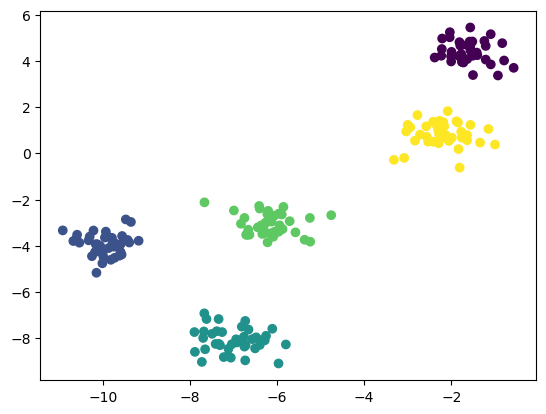

In [127]:
# Using matplotlib, we can visualize the clusters generated by make_blobs.
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()
plt.tight_layout()

<h2>Loading a CSV file</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Importing a comma-seperated value (CSV) file. 
</div>

In [140]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv'
df = pd.read_csv(url)
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<h2>Loading a Excel file</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Importing an Excel spreadsheet.
</div>

In [146]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'
df = pd.read_excel(url, sheet_name=0, header=0)
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<h2>Loading a JSON file</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Importing a JSON value file. 
</div>

In [153]:
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'
df = pd.read_json(url, orient="columns")
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<h2>Loading a Parquet file</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Importing a parquet file. 
</div>

In [162]:
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet'
df = pd.read_parquet(url)
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<h2>Loading a Avro file</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Importing a avro file. 
</div>

In [11]:
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro'

response = requests.get(url)
if response.status_code == 200:
    with open("data.avro","wb") as f:
        f.write(response.content)
else:
    print(f"Failed to download the file. HTTP Status Code: {response.status_code}")

df = pdx.read_avro("data.avro")
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<h2>Querying a SQLite Database</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Loading the data from the database using the Structured Query Language (SQL).
</div>

In [22]:
database_connection = create_engine("sqlite:///sample.db")
data = pd.read_sql_query("SELECT  * FROM data", database_connection)

<h2>Loading the Data from the Google Sheet</h2>
<div style="font-size:18px;font-family:Times New Roman">
    You need to read data in directly from a Google Sheet.
</div>

In [28]:
url = "https://docs.google.com/spreadsheets/d/1ehC9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv"
data = pd.read_csv(url)

<h2>Loading Unstructured Data</h2>
<div style="font-size:18px;font-family:Times New Roman">
    Loading the unstructured data like text or images.
</div>

In [34]:
url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"
response = requests.get(url)
if response.status_code == 200:
    with open("text.txt","wb") as f:
        f.write(response.content)

with open("text.txt", "r") as f:
    text = f.read()

print(text)

Hello there!


## Done with Day 2 ;)